In [1]:
# required Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import bayes_mvs, norm, iqr

In [2]:
# Set Nature-like plots
import matplotlib as mpl
# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 19
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
#mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

In [3]:
dataset = pd.read_csv('output/test2024-03-21_lambda_search.csv')
dataset2 = pd.read_csv('output/test2024-03-21_lambda_refined_search.csv')
dataset3 = pd.read_csv('output/test2024-03-22_lambda_refined_search.csv')
dataset

,Euler1,Euler2,Euler3,1649.8,1669.09,1688.37,1707.66,1726.94,1746.23,1765.51,...,1861.93,1881.22,1900.5,1919.79,1939.07,1958.36,1977.64,1996.93,2016.21,2035.5
0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.395,0.000,0.000,0.000,0.000
1,0,0,22,0.000,0.012,0.009,0.013,0.012,0.000,0.010,...,0.000,0.653,0.001,0.000,0.000,0.000,0.298,0.274,0.000,0.000
2,0,0,44,0.000,0.030,0.005,1.357,0.004,0.000,0.003,...,0.000,0.001,0.000,0.000,0.313,0.000,0.000,0.000,0.000,0.000
3,0,0,66,0.000,0.016,0.004,0.008,0.002,0.000,0.007,...,0.000,0.000,0.000,0.401,0.000,0.000,0.209,0.000,0.000,0.000
4,0,0,88,0.000,0.002,0.002,0.001,0.016,0.002,0.016,...,0.001,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,88,88,88,0.051,0.014,2.674,2.844,2.233,2.189,2.828,...,0.846,2.003,1.454,0.036,0.136,0.027,0.032,0.031,0.029,0.031
221,88,88,110,0.025,0.010,2.828,2.507,2.041,2.106,5.206,...,1.034,0.534,0.831,0.206,2.002,0.043,0.033,0.030,0.025,0.031
222,88,88,132,0.022,0.009,3.586,2.286,2.339,1.407,2.193,...,2.011,0.679,1.974,0.071,0.057,1.557,0.036,0.027,0.031,0.040
223,88,88,154,0.054,0.024,2.005,0.853,2.834,1.279,2.828,...,1.038,0.387,2.003,2.002,0.142,0.180,0.055,0.035,0.026,0.032


In [4]:
dataset.loc[:, ~dataset.columns.isin(['Euler1', 'Euler2', 'Euler3'])].describe()

,1649.8,1669.09,1688.37,1707.66,1726.94,1746.23,1765.51,1784.8,1804.08,1823.37,...,1861.93,1881.22,1900.5,1919.79,1939.07,1958.36,1977.64,1996.93,2016.21,2035.5
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.057587,0.128133,0.509102,1.075573,0.981720,0.418978,1.239804,16.479884,2.964178,0.480991,...,0.256889,0.236582,0.190267,0.165622,0.148404,0.057440,0.060338,0.051893,0.068347,0.063431
std,0.175985,0.321952,0.904833,1.427870,1.274242,0.750517,1.848092,14.900081,3.714237,0.791169,...,0.475542,0.485666,0.412205,0.422496,0.478835,0.134427,0.105541,0.087954,0.268839,0.164546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001000,0.007000,0.012000,0.065000,0.115000,0.011000,0.094000,6.277000,0.348000,0.017000,...,0.007000,0.005000,0.004000,0.003000,0.003000,0.002000,0.003000,0.003000,0.002000,0.003000
50%,0.004000,0.015000,0.055000,0.393000,0.368000,0.046000,0.446000,13.287000,1.892000,0.060000,...,0.023000,0.016000,0.014000,0.009000,0.010000,0.006000,0.009000,0.007000,0.005000,0.007000
75%,0.010000,0.041000,0.634000,1.773000,1.579000,0.346000,1.916000,21.713000,4.001000,0.657000,...,0.248000,0.143000,0.074000,0.069000,0.057000,0.052000,0.059000,0.052000,0.045000,0.053000
max,1.008000,2.026000,4.928000,8.714000,5.639000,3.619000,14.822000,82.614000,19.911000,4.323000,...,2.316000,2.991000,2.003000,3.690000,4.380000,1.557000,0.764000,0.341000,3.138000,2.025000


## Visualize distributions

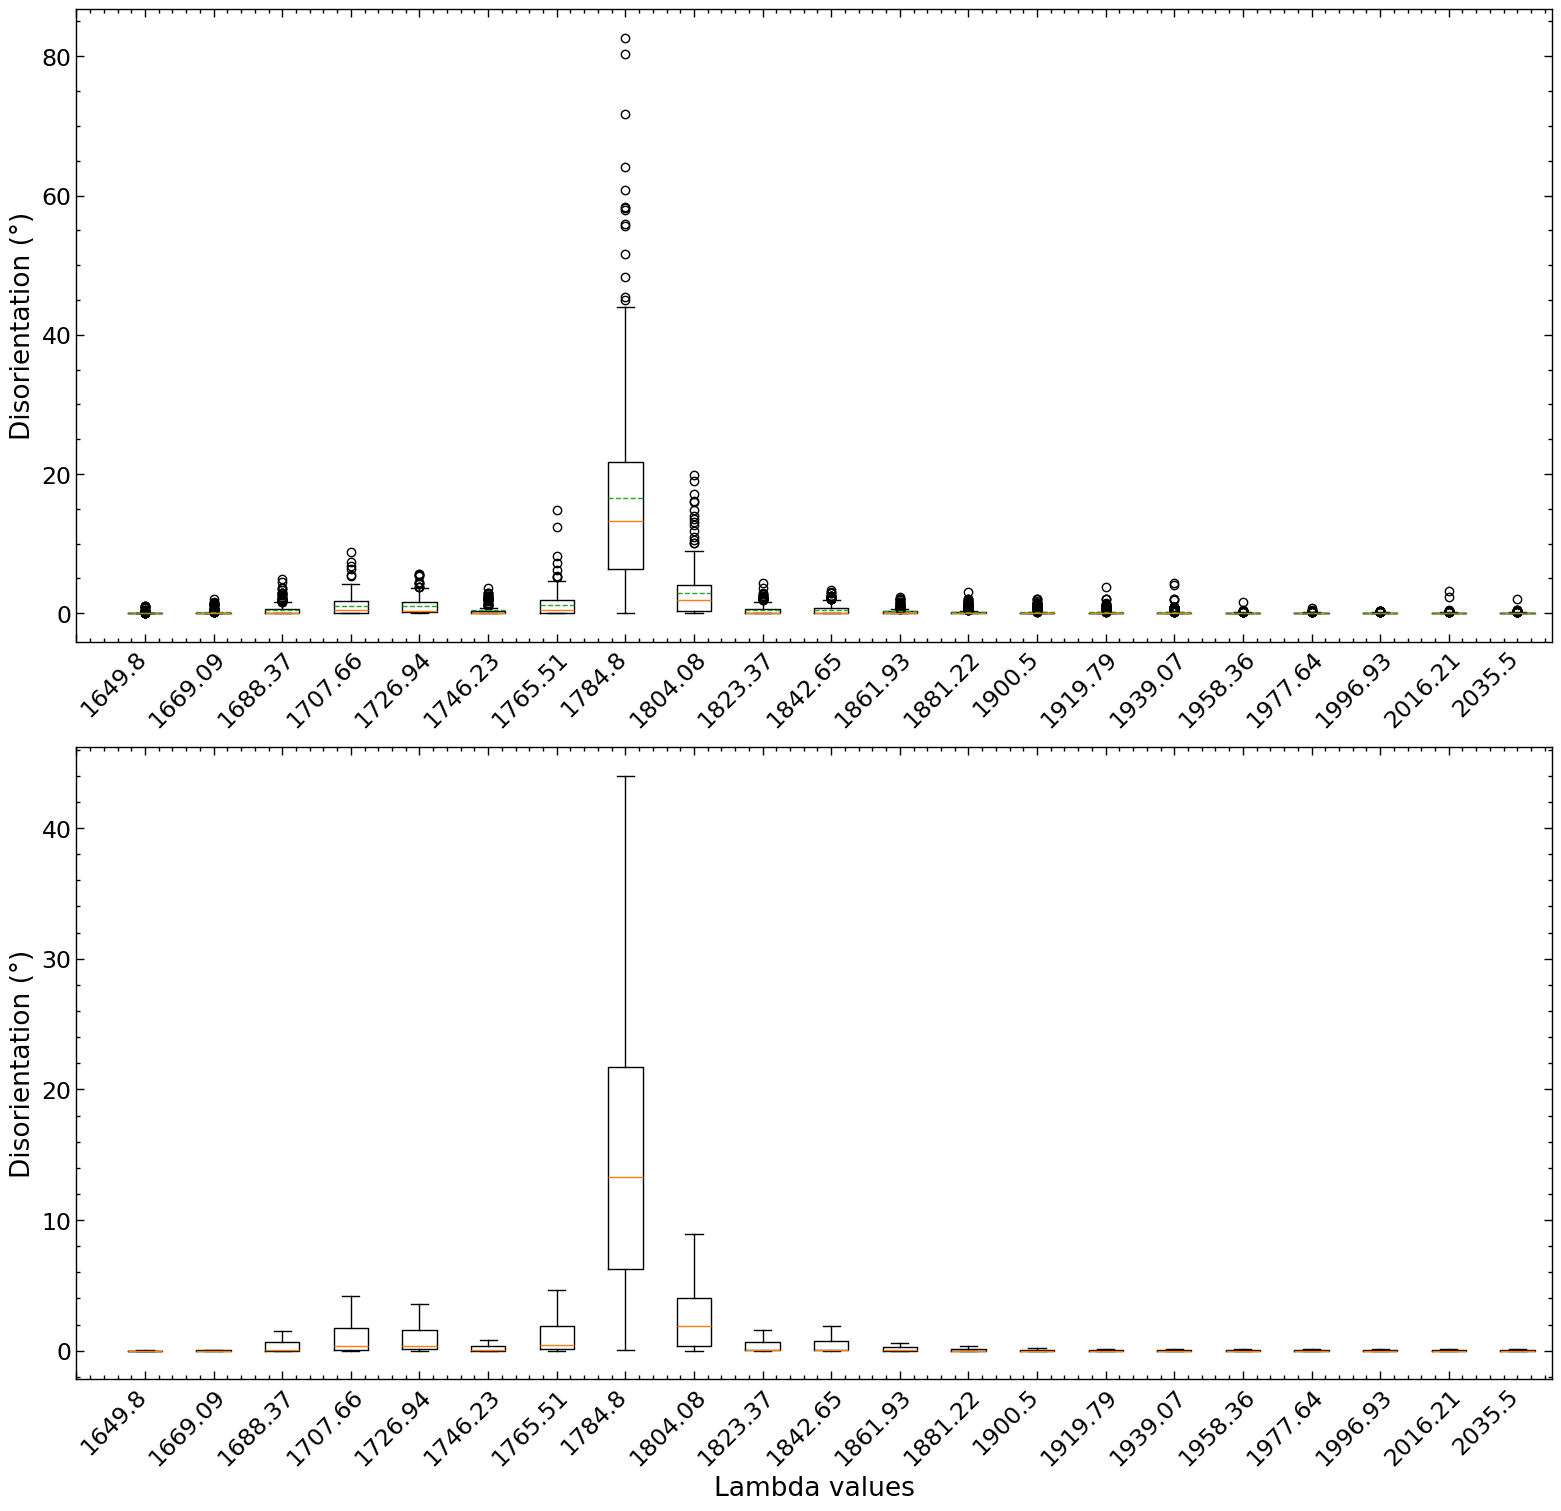

In [5]:
labels = dataset.columns.values.tolist()[3:]

fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5*3.1, 15), constrained_layout=True)

ax1.boxplot(dataset[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(21), labels, rotation=45, ha='left')
ax1.set_ylabel('Disorientation (°)')

ax2.boxplot(dataset[labels], showfliers=False, labels=labels)
ax2.set_xticks(np.arange(21), labels, rotation=45, ha='left')
ax2.set_ylabel('Disorientation (°)')
_ = ax2.set_xlabel('Lambda values')

Text(0.5, 0, 'Lambda values')

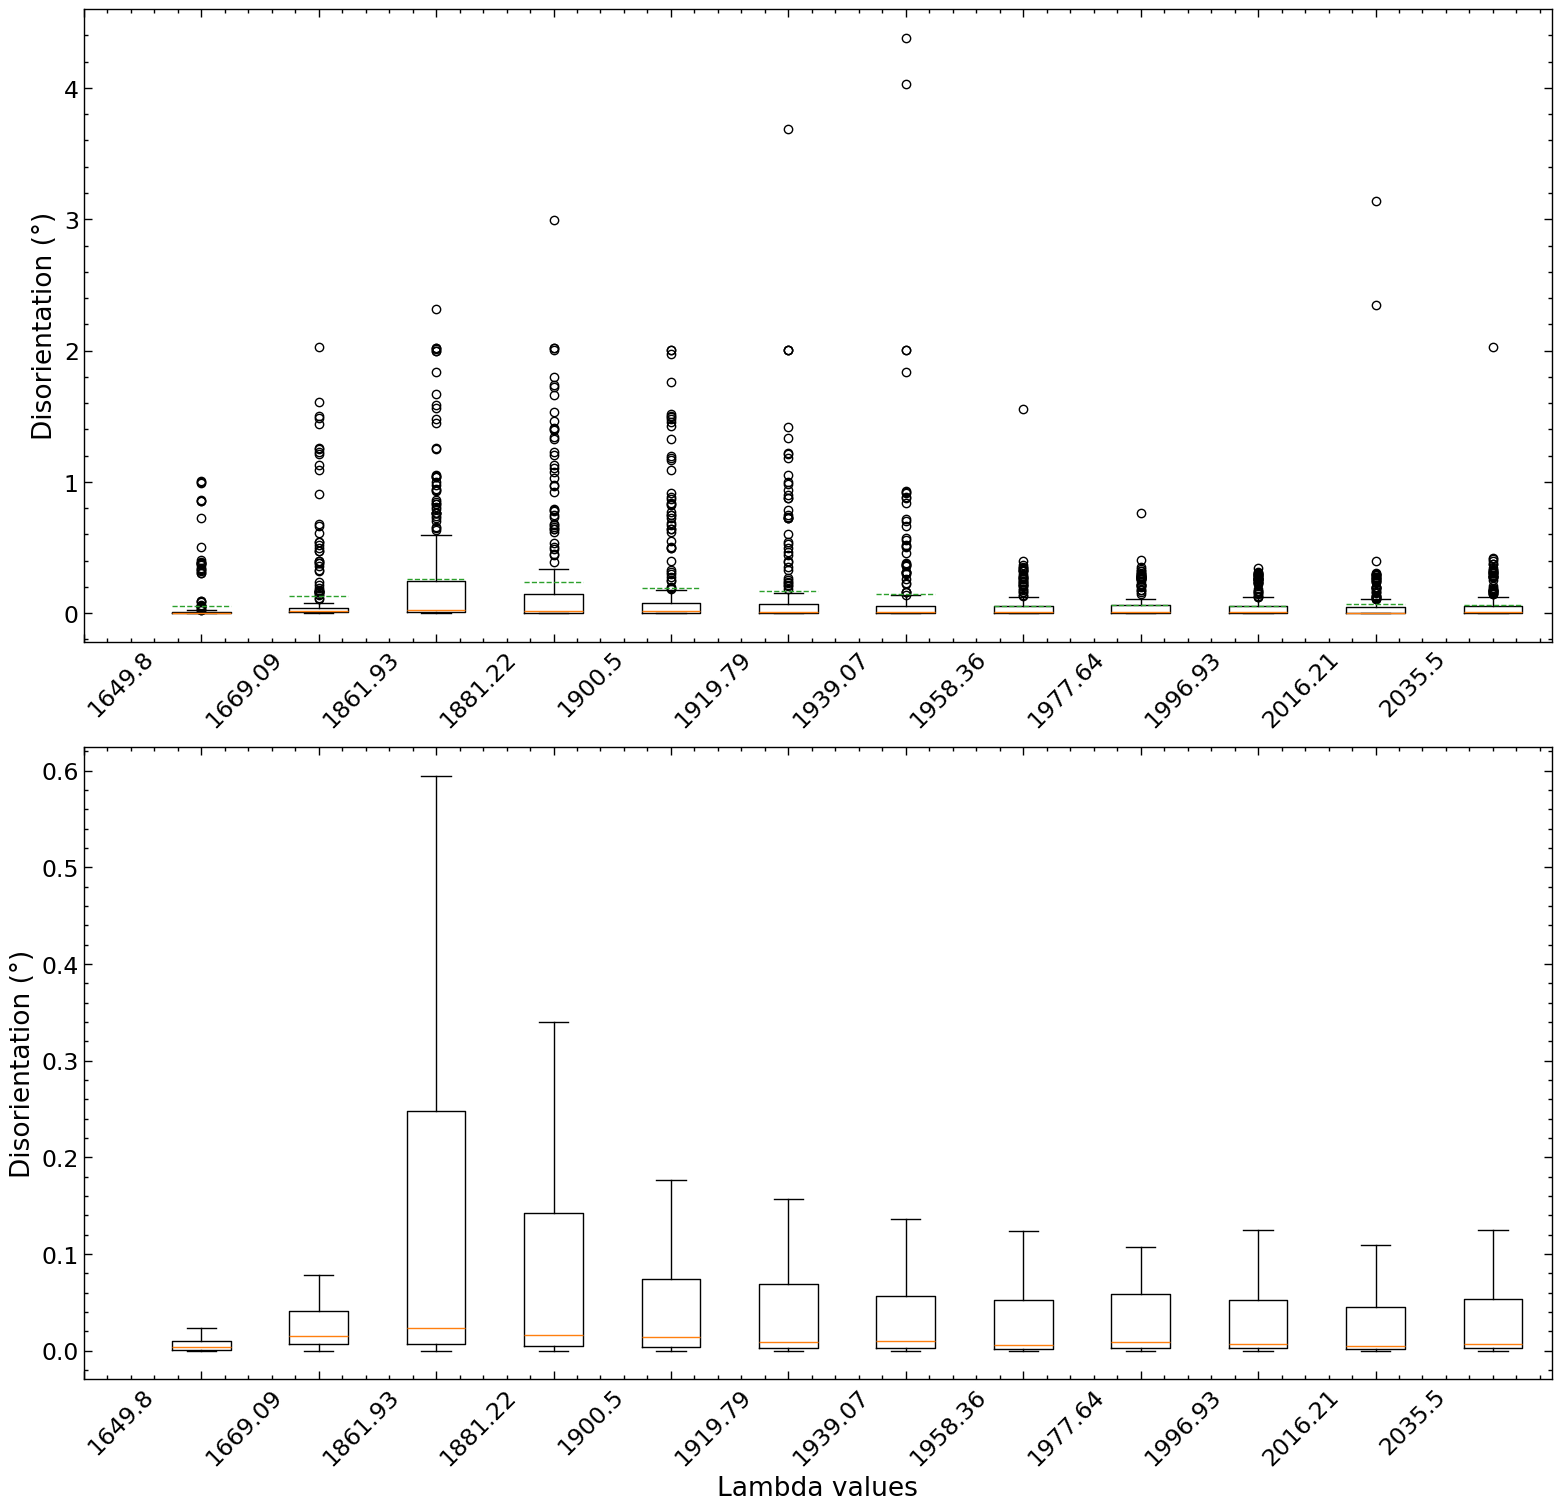

In [6]:
labels = dataset.columns.values.tolist()[3:5] + dataset.columns.values.tolist()[-10:]

fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5*3.1, 15), constrained_layout=True)

ax1.boxplot(dataset[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(12), labels, rotation=45, ha='left')
ax1.set_ylabel('Disorientation (°)')

ax2.boxplot(dataset[labels], showfliers=False, labels=labels)
ax2.set_xticks(np.arange(12), labels, rotation=45, ha='left')
ax2.set_ylabel('Disorientation (°)')
ax2.set_xlabel('Lambda values')

## Percent of wrong estimates

In [7]:
labels = dataset.columns.values.tolist()[3:]
100 * (dataset[labels] > 1).mean()

1649.8      0.888889
1669.09     4.888889
1688.37    19.111111
1707.66    36.888889
1726.94    30.666667
1746.23    16.000000
1765.51    39.555556
1784.8     91.555556
1804.08    63.111111
1823.37    18.222222
1842.65    19.111111
1861.93     8.444444
1881.22     9.333333
1900.5      6.666667
1919.79     4.444444
1939.07     2.222222
1958.36     0.444444
1977.64     0.000000
1996.93     0.000000
2016.21     0.888889
2035.5      0.444444
dtype: float64

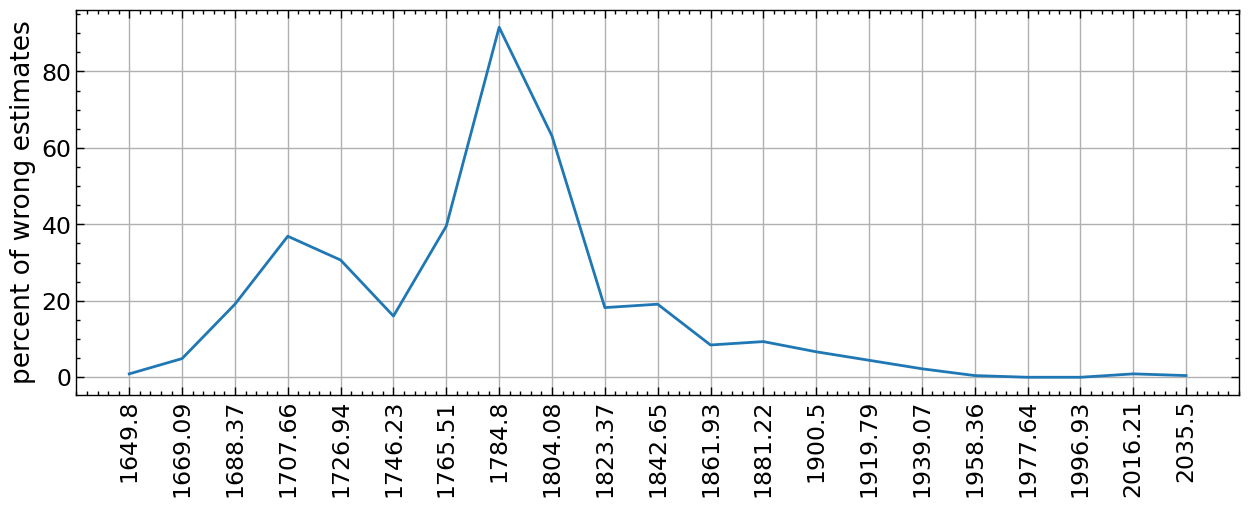

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(labels, 100 * (dataset[labels] > 1).mean())
ax.set_ylabel('percent of wrong estimates')
ax.grid()
_ = ax.set_xticks(np.arange(21), labels, rotation='vertical') 

---

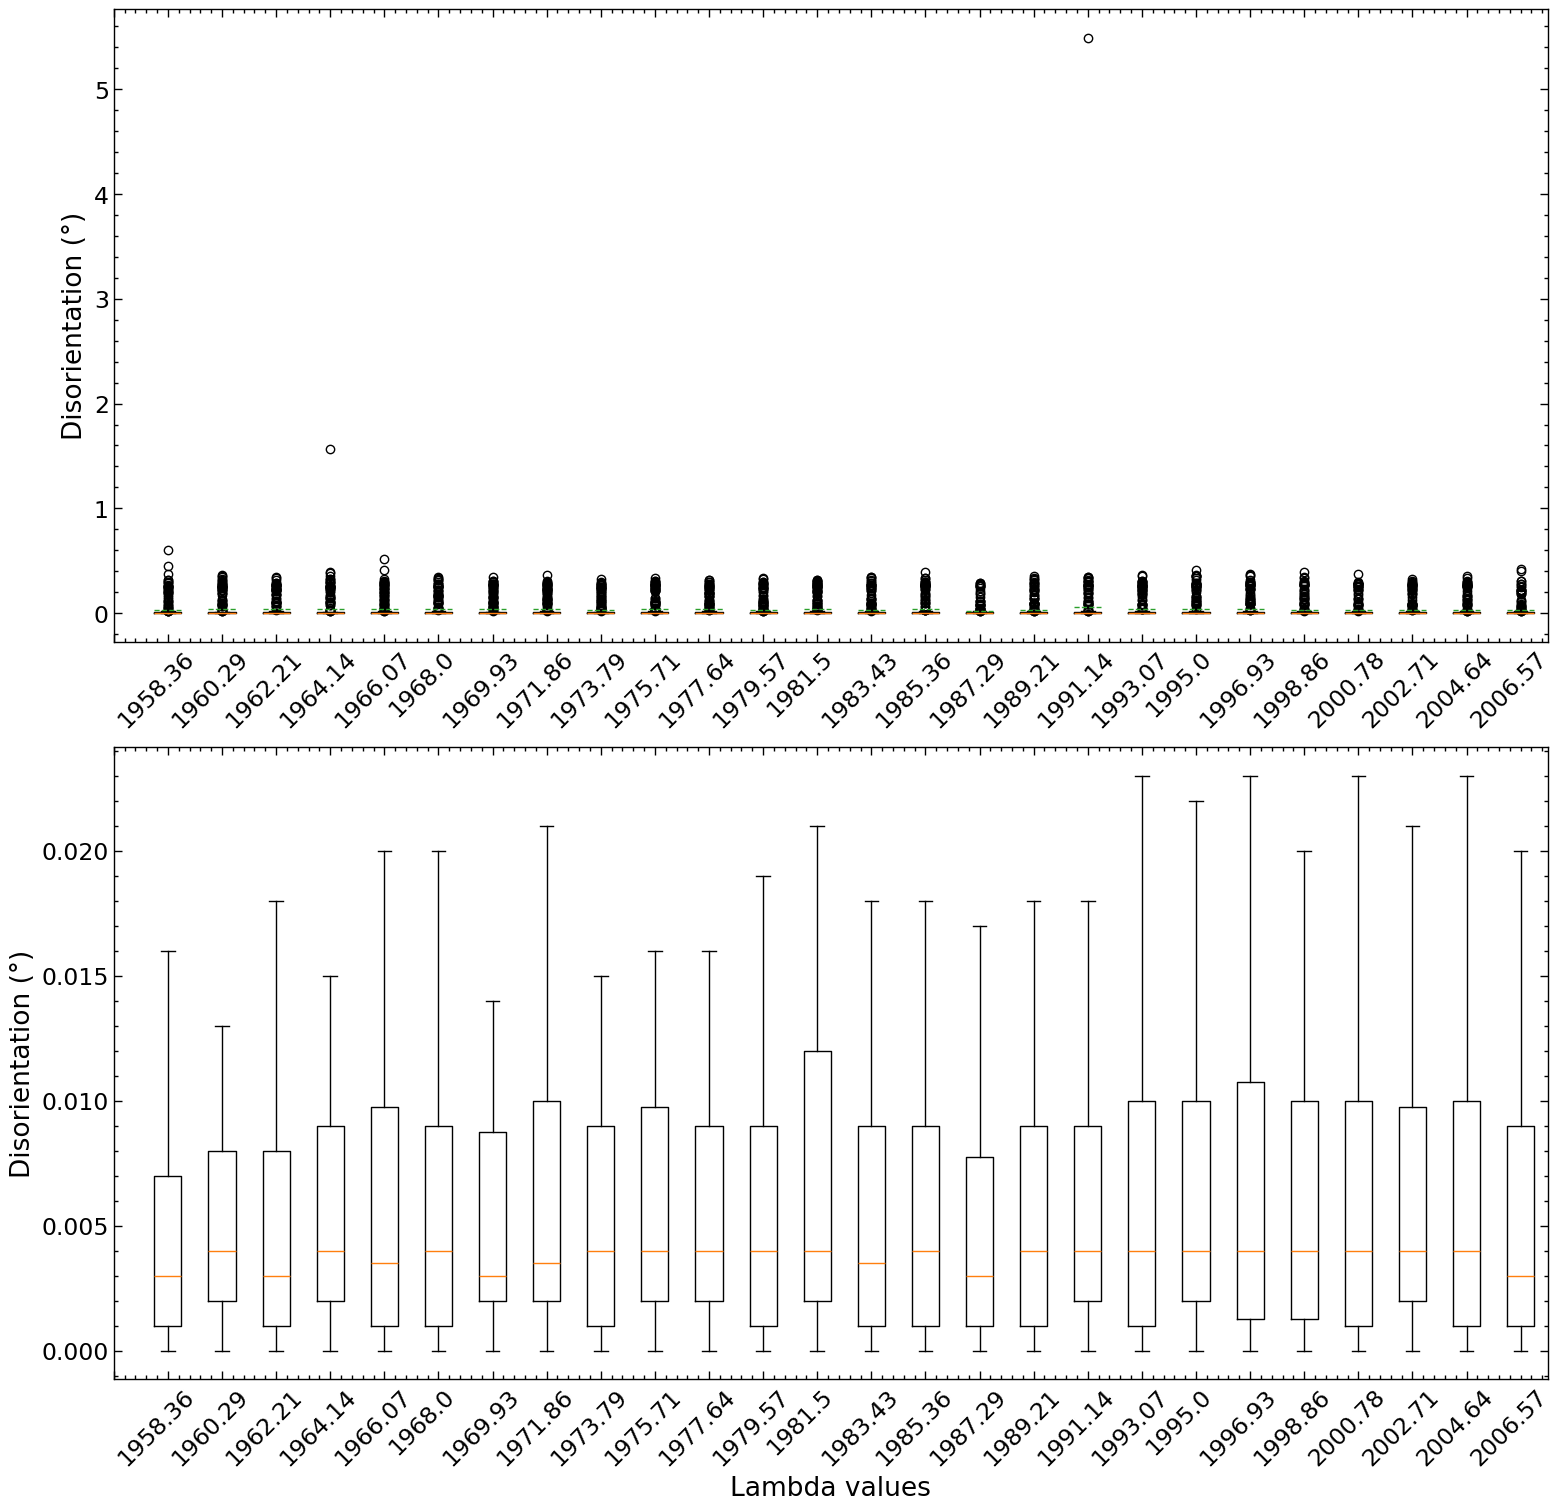

In [9]:
labels = dataset2.columns.values.tolist()[3:]

fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5*3.1, 15), constrained_layout=True)

ax1.boxplot(dataset2[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(26), labels, rotation=45, ha='left')
ax1.set_ylabel('Disorientation (°)')

ax2.boxplot(dataset2[labels], showfliers=False, labels=labels)
ax2.set_xticks(np.arange(26), labels, rotation=45, ha='left')
ax2.set_ylabel('Disorientation (°)')
_ = ax2.set_xlabel('Lambda values')

In [10]:
np.around(dataset2[labels].mean(), 2)

1958.36    0.03
1960.29    0.04
1962.21    0.04
1964.14    0.04
1966.07    0.04
1968.0     0.04
1969.93    0.04
1971.86    0.04
1973.79    0.03
1975.71    0.04
1977.64    0.04
1979.57    0.03
1981.5     0.04
1983.43    0.03
1985.36    0.04
1987.29    0.02
1989.21    0.03
1991.14    0.06
1993.07    0.04
1995.0     0.04
1996.93    0.04
1998.86    0.03
2000.78    0.03
2002.71    0.03
2004.64    0.03
2006.57    0.03
dtype: float64

In [11]:
100 * (dataset2[labels] > 0.3).mean()

1958.36    2.0
1960.29    2.8
1962.21    1.2
1964.14    2.8
1966.07    1.6
1968.0     2.0
1969.93    1.2
1971.86    1.2
1973.79    0.4
1975.71    1.2
1977.64    0.8
1979.57    0.8
1981.5     1.6
1983.43    2.0
1985.36    1.6
1987.29    0.0
1989.21    1.6
1991.14    3.2
1993.07    2.0
1995.0     3.2
1996.93    1.6
1998.86    2.0
2000.78    0.4
2002.71    0.8
2004.64    1.2
2006.57    1.6
dtype: float64

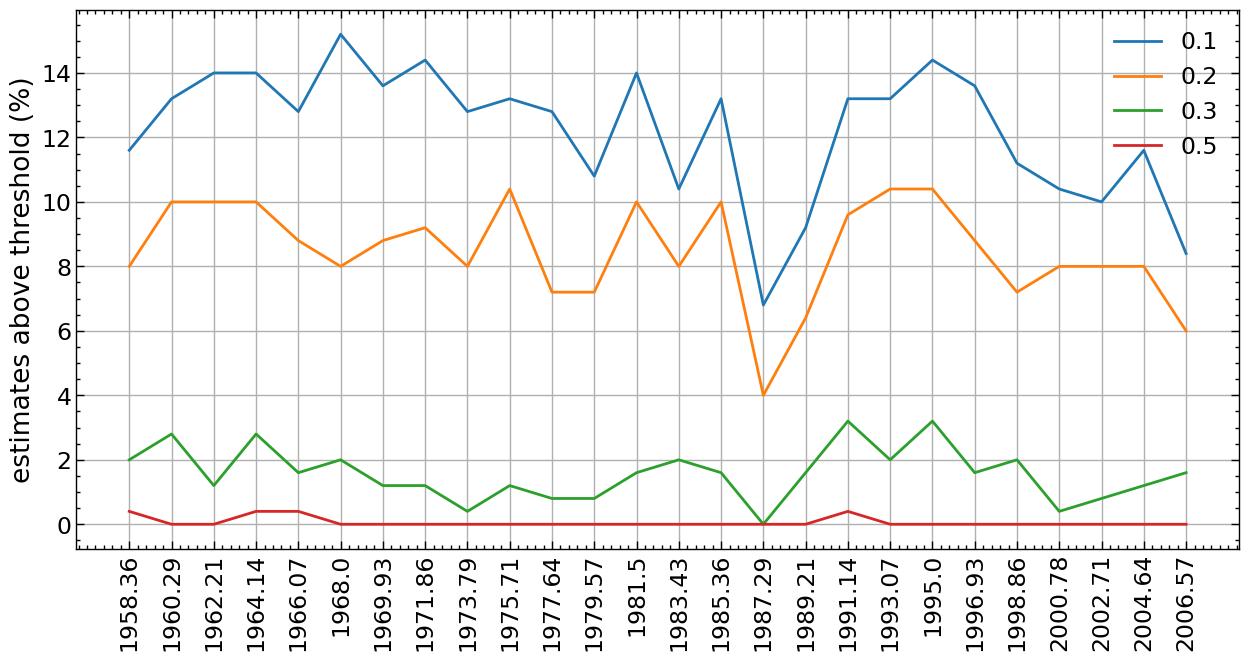

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(labels, 100 * (dataset2[labels] > 0.1).mean(), label=0.1)
ax.plot(labels, 100 * (dataset2[labels] > 0.2).mean(), label=0.2)
ax.plot(labels, 100 * (dataset2[labels] > 0.3).mean(), label=0.3)
ax.plot(labels, 100 * (dataset2[labels] > 0.5).mean(), label=0.5)
ax.set_ylabel('estimates above threshold (%)')
ax.grid()
ax.legend()
_ = ax.set_xticks(np.arange(26), labels, rotation='vertical') 

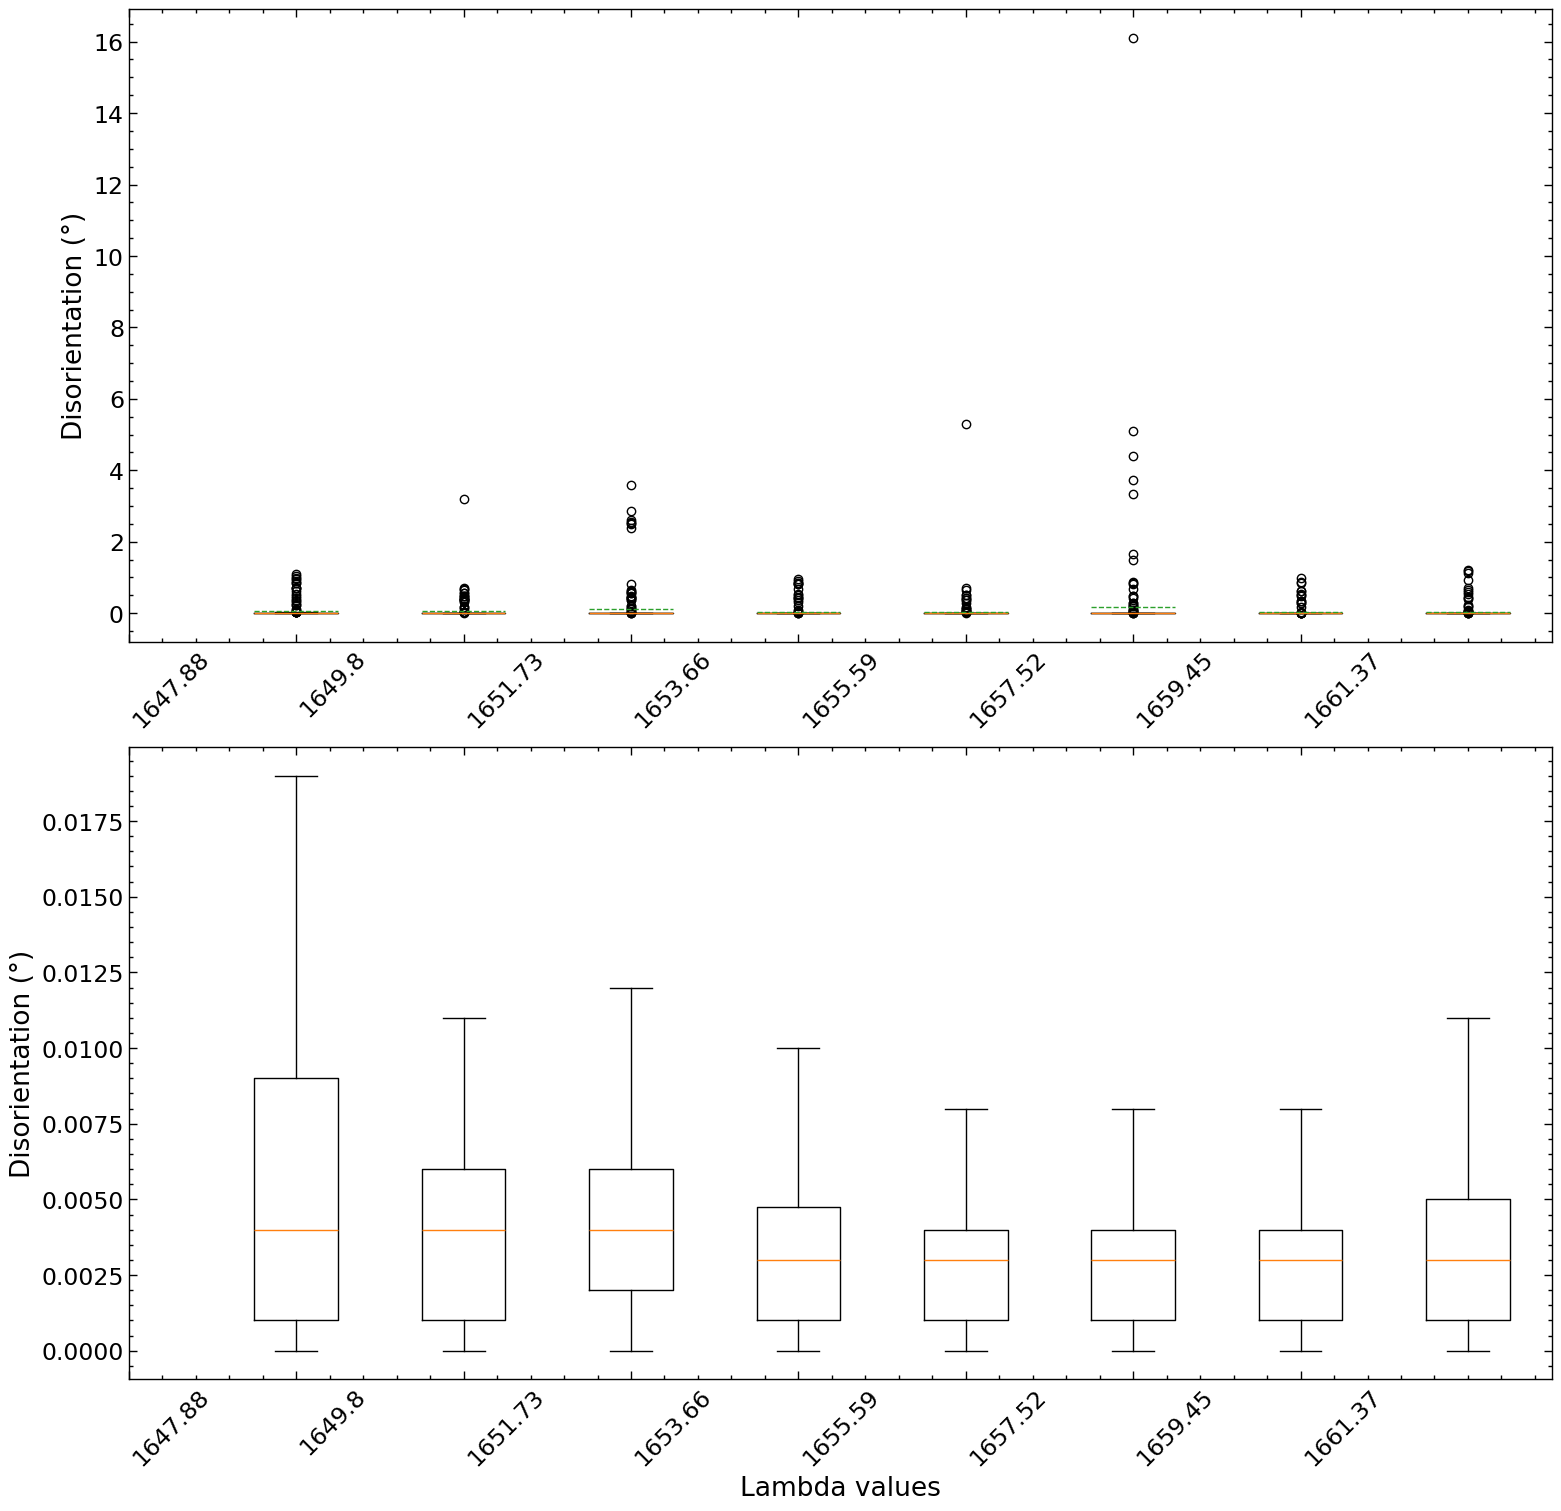

In [13]:
labels = dataset3.columns.values.tolist()[7:]

fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5*3.1, 15), constrained_layout=True)

ax1.boxplot(dataset3[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(8), labels, rotation=45, ha='left')
ax1.set_ylabel('Disorientation (°)')

ax2.boxplot(dataset3[labels], showfliers=False, labels=labels)
ax2.set_xticks(np.arange(8), labels, rotation=45, ha='left')
ax2.set_ylabel('Disorientation (°)')
_ = ax2.set_xlabel('Lambda values')

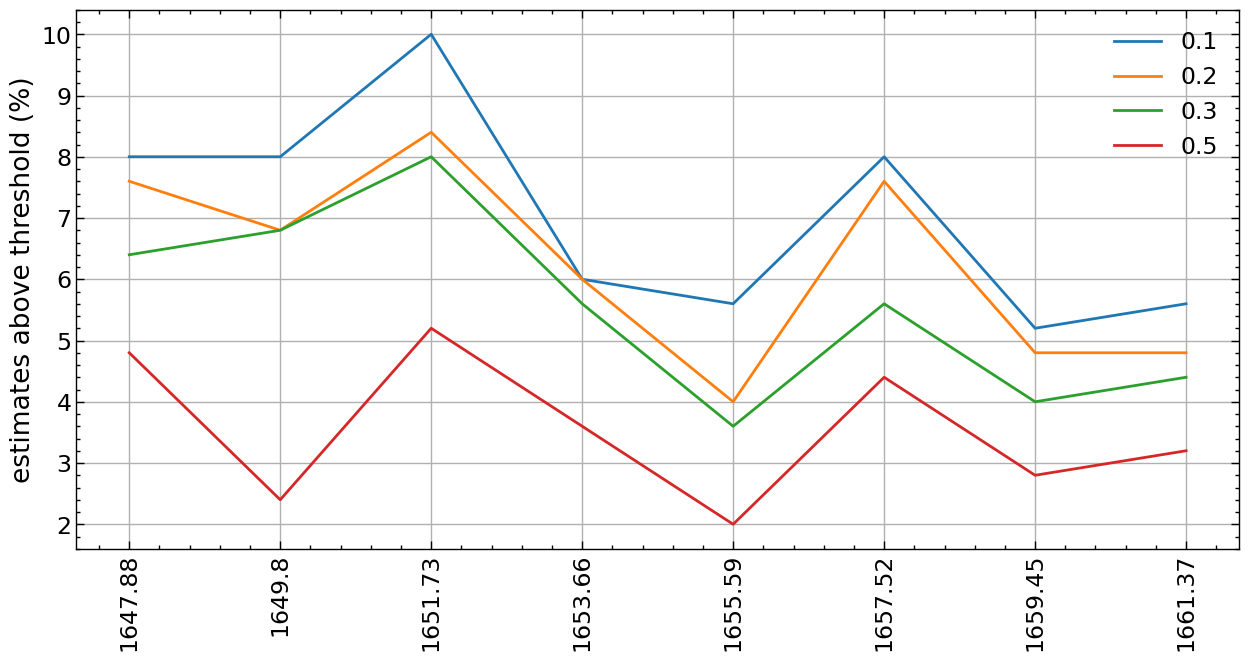

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(labels, 100 * (dataset3[labels] > 0.1).mean(), label=0.1)
ax.plot(labels, 100 * (dataset3[labels] > 0.2).mean(), label=0.2)
ax.plot(labels, 100 * (dataset3[labels] > 0.3).mean(), label=0.3)
ax.plot(labels, 100 * (dataset3[labels] > 0.5).mean(), label=0.5)
ax.set_ylabel('estimates above threshold (%)')
ax.grid()
ax.legend()
_ = ax.set_xticks(np.arange(8), labels, rotation='vertical') 

In [15]:
100 * (dataset3[labels] > 0.3).mean()

1647.88    6.4
1649.8     6.8
1651.73    8.0
1653.66    5.6
1655.59    3.6
1657.52    5.6
1659.45    4.0
1661.37    4.4
dtype: float64